In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import math

In [3]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [4]:
import joblib
from sklearn.model_selection import train_test_split

# Data load

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
items = pd.read_csv('items.csv')
items.drop('item_name', axis=1, inplace=True)

item_categories = pd.read_csv('item_categories_pre.csv')

In [7]:
train = pd.merge(train, items)
train = pd.merge(train, item_categories)

test = pd.merge(test, items)
test = pd.merge(test, item_categories)

In [8]:
train['revenue'] = train['item_price'] * train['item_cnt_day']

# Column 설정

In [9]:
target = 'item_cnt_day'

In [10]:
columns_cat = joblib.load('columns_cat.pkl')
columns_binary_num = joblib.load('columns_binary_num.pkl')
columns_binary_cat = joblib.load('columns_binary_cat.pkl')
columns_dt = joblib.load('columns_dt.pkl')

In [11]:
columns_num = []

for column in train.columns :
    
    if column not in columns_cat :
        columns_num.append(column)

In [12]:
for column in columns_dt :
    columns_num.remove(column)

In [13]:
columns_cat

['shop_id', 'item_id', 'item_category_id', 'type_id', 'subtype_id']

In [14]:
columns_num

['date_block_num', 'item_price', 'item_cnt_day', 'revenue']

In [15]:
columns_dt

['date']

In [16]:
joblib.dump(columns_num, 'columns_num.pkl')

['columns_num.pkl']

## datetime 설정

In [17]:
def data_summary(data):
    summary = pd.DataFrame(data.dtypes, columns=['Dtype'])
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Unique value'] = data.nunique().values
    summary['Null count'] = data.isnull().sum().values
    summary['Null percent'] = data.isnull().sum().values / len(data) * 100
    summary['Null percent'] = round(summary['Null percent'], 1)
    
    return summary

In [18]:
train['year'] = train['date'].apply(lambda x : x.split('.')[2])
train['month'] = train['date'].apply(lambda x : x.split('.')[1])
train['day'] = train['date'].apply(lambda x : x.split('.')[0])

In [19]:
train['year'] = train['year'].astype('str')
train['month'] = train['month'].astype('str')
train['day'] = train['day'].astype('str')

In [20]:
train.drop('date', axis=1, inplace=True)

In [21]:
train

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,type_id,subtype_id,revenue,year,month,day
0,0,59,22154,999.0,1.0,37,11,1,999.0,2013,01,02
1,0,24,22154,999.0,1.0,37,11,1,999.0,2013,01,23
2,0,27,22154,999.0,1.0,37,11,1,999.0,2013,01,20
3,0,25,22154,999.0,1.0,37,11,1,999.0,2013,01,02
4,0,25,22154,999.0,1.0,37,11,1,999.0,2013,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,33,55,13093,250.0,1.0,36,9,15,250.0,2015,10,22
2935845,32,55,13091,1000.0,1.0,36,9,15,1000.0,2015,09,21
2935846,32,55,13094,2500.0,1.0,36,9,15,2500.0,2015,09,16
2935847,32,55,13094,2500.0,2.0,36,9,15,5000.0,2015,09,22


In [22]:
train_summary = data_summary(train)
train_summary

,Dtype,Unique value,Null count,Null percent
date_block_num,int64,34,0,0.0
shop_id,int64,60,0,0.0
item_id,int64,21807,0,0.0
item_price,float64,19993,0,0.0
item_cnt_day,float64,198,0,0.0
item_category_id,int64,84,0,0.0
type_id,int64,20,0,0.0
subtype_id,int64,65,0,0.0
revenue,float64,24775,0,0.0
year,object,3,0,0.0


In [23]:
columns_cat.extend(['year', 'month', 'day'])

# Train & test set 분리

In [24]:
# train, test = train_test_split(data, random_state=30)
# train, test = train_test_split(data, stratify=target, random_state=30)   # 계층적 sampling

# EDA
- EDA는 train set으로만 진행
- Train set가 너무 크면, 탐색을 위한 별도의 sampling 진행

In [25]:
train_sp = train.sample(frac=0.04, random_state=30)
train_sp.shape

(117434, 12)

## 수치형 data

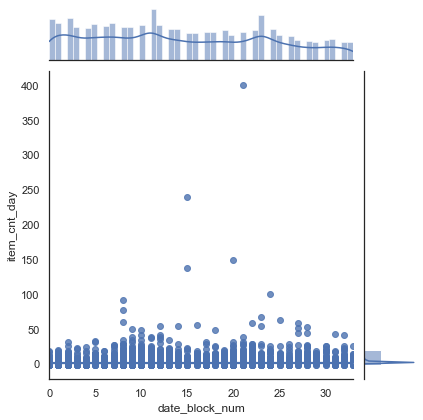

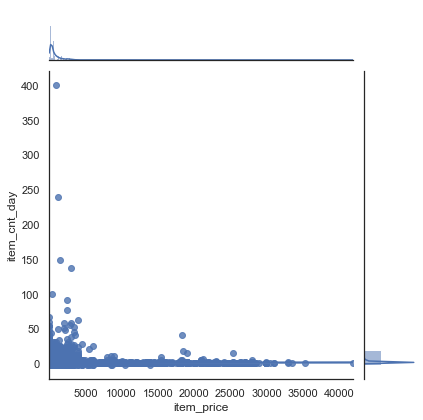

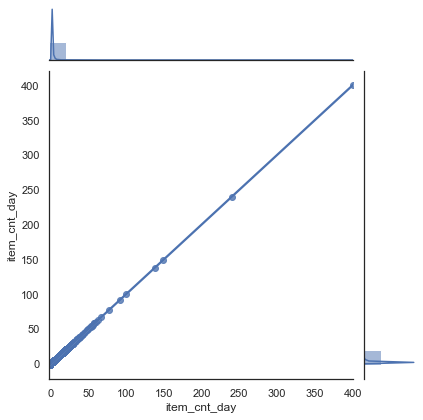

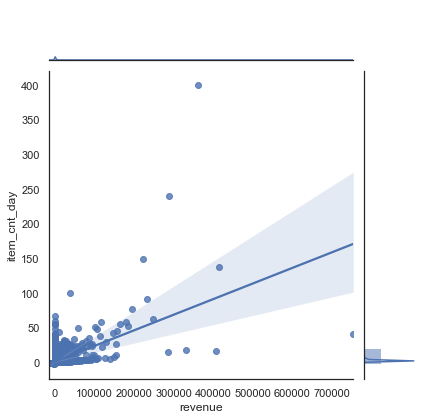

In [26]:
k = len(columns_num)

for i in range(k) :
    with sns.axes_style('white') :
        sns.jointplot(data=train_sp, x=columns_num[i], y=target, kind='reg')

In [27]:
corr_matrix = train.corr()
corr_matrix[target].sort_values(ascending=False)

item_cnt_day        1.000000
revenue             0.407954
subtype_id          0.064222
item_id             0.016650
item_category_id    0.014768
item_price          0.011197
date_block_num      0.009402
type_id            -0.001566
shop_id            -0.005230
Name: item_cnt_day, dtype: float64

<AxesSubplot:>

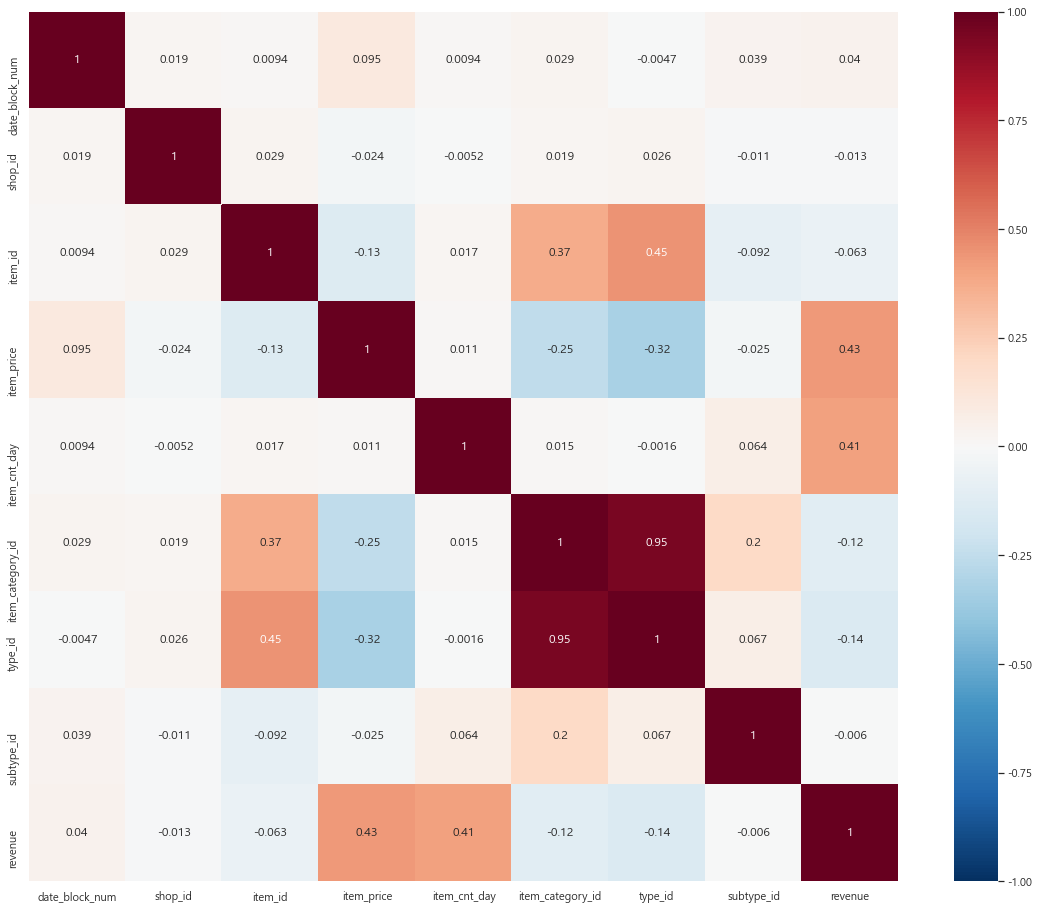

In [28]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, square=True, cbar=True, ax=ax)

## 범주형 data

In [29]:
def get_crosstab(data, column, target) :
    crosstab = pd.crosstab(data[column], data[target], normalize='index') * 100
    
    return crosstab

In [30]:
columns_cat_count = []

for column in columns_cat :
    
    if len(train[column].value_counts()) <= 20 :
        columns_cat_count.append(column)

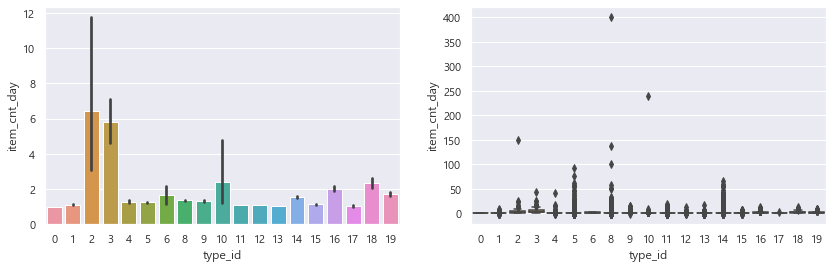

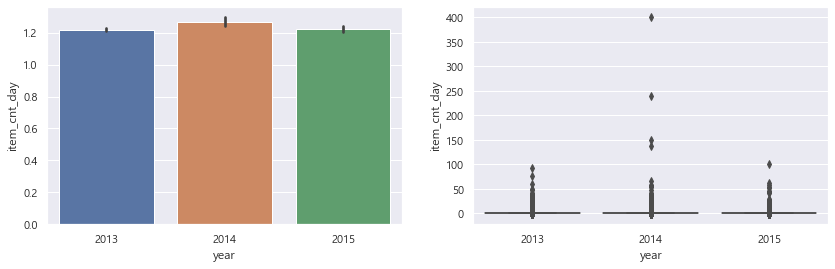

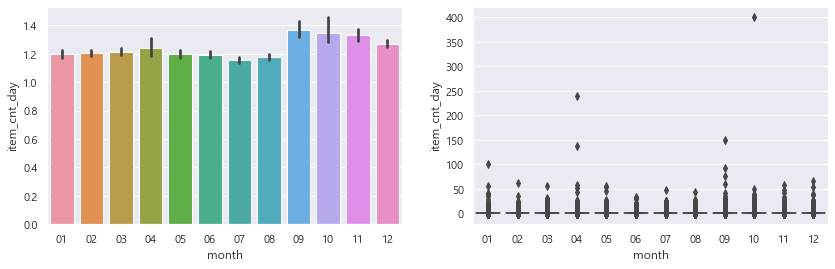

In [31]:
k = len(columns_cat_count)

for i in range(k) :
    crosstab = get_crosstab(train_sp, columns_cat_count[i], target)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    sns.barplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax1)
    sns.boxplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax2)

In [32]:
columns_cat_count = []

for column in columns_cat :
    
    if 20 < len(train[column].value_counts()) <= 40 :
        columns_cat_count.append(column)

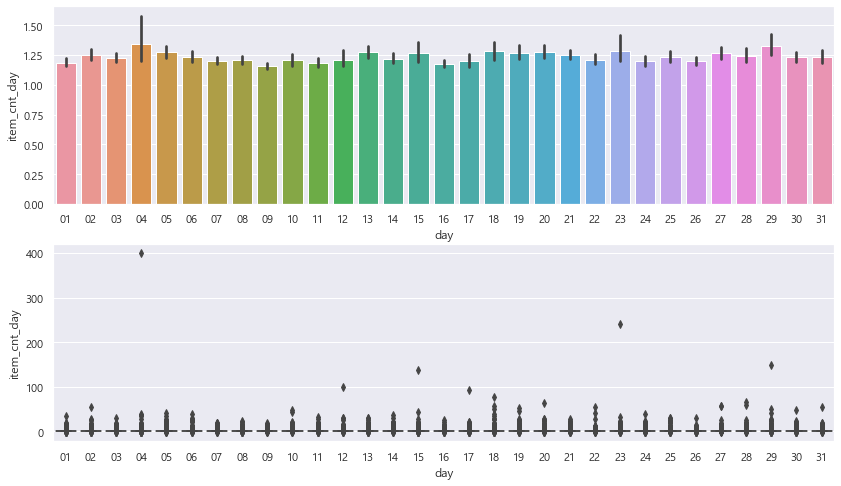

In [33]:
k = len(columns_cat_count)

for i in range(k) :
    crosstab = get_crosstab(train_sp, columns_cat_count[i], target)
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
    sns.barplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax1)
    sns.boxplot(data=train_sp, x=columns_cat_count[i], y=target, order=crosstab.index, ax=ax2)

## target 확인

<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

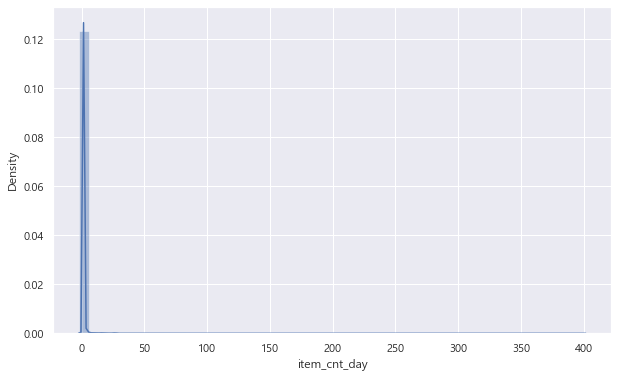

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(train_sp[target], ax=ax)

In [35]:
# target 분포를 log scale로 확인
# 조금 더 정규 분포에 가까운 분포를 띄는지 확인하기 위함
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.distplot(np.log1p(train_sp[target]), ax=ax)

# Group by

## date_block_num

In [36]:
train_gb = train.groupby('date_block_num').agg({
    'year' : 'first',
    'month' : 'first',
    target : 'sum',
    'revenue' : 'sum'
})

In [37]:
train_gb

,year,month,item_cnt_day,revenue
date_block_num,,,,
0,2013,01,131479.0,9.194709e+07
1,2013,02,128090.0,9.066571e+07
2,2013,03,147142.0,1.049327e+08
3,2013,04,107190.0,6.915429e+07
4,2013,05,106970.0,6.506531e+07
5,2013,06,125381.0,7.955041e+07
6,2013,07,116966.0,6.935060e+07
7,2013,08,125291.0,7.429797e+07
8,2013,09,133332.0,1.190819e+08


In [38]:
train_gb_2013 = train_gb[train_gb['year'] == '2013']
train_gb_2014 = train_gb[train_gb['year'] == '2014']
train_gb_2015 = train_gb[train_gb['year'] == '2015']

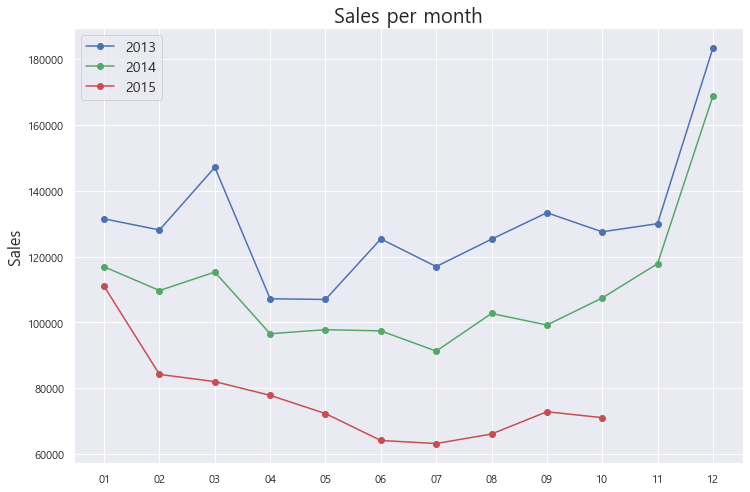

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(train_gb_2013['month'], train_gb_2013[target], '-ob', label='2013')
plt.plot(train_gb_2014['month'], train_gb_2014[target], '-og', label='2014')
plt.plot(train_gb_2015['month'], train_gb_2015[target], '-or', label='2015')

plt.title('Sales per month', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend(fontsize=14)

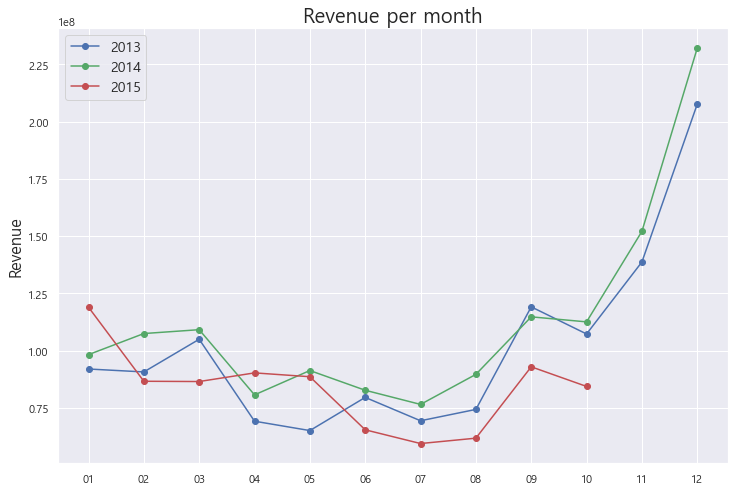

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(train_gb_2013['month'], train_gb_2013['revenue'], '-ob', label='2013')
plt.plot(train_gb_2014['month'], train_gb_2014['revenue'], '-og', label='2014')
plt.plot(train_gb_2015['month'], train_gb_2015['revenue'], '-or', label='2015')

plt.title('Revenue per month', fontsize=20)
plt.ylabel('Revenue', fontsize=16)
plt.legend(fontsize=14)

## item_id

In [41]:
train_gb = train.groupby('item_id').agg({
    target : 'sum',
    'revenue' : 'sum'
})

In [42]:
train_gb

,item_cnt_day,revenue
item_id,,
0,1.0,58.00
1,6.0,26940.00
2,2.0,116.00
3,2.0,158.00
4,1.0,58.00
...,...,...
22165,2.0,118.00
22166,348.0,52200.00
22167,1320.0,393108.75


In [43]:
train_gb_order = train_gb.sort_values(target, ascending=False)
train_gb_order

,item_cnt_day,revenue
item_id,,
20949,187642.0,9.288637e+05
2808,17245.0,1.685278e+07
3732,16642.0,4.361798e+07
17717,15830.0,1.720083e+07
5822,14515.0,1.540898e+07
...,...,...
7547,0.0,0.000000e+00
13474,-1.0,-1.039800e+04
18062,-1.0,-4.999000e+03


In [44]:
train_gb_top = train_gb_order.iloc[:20]
train_gb_top.index = train_gb_top.index.astype('str')

Text(0, 0.5, 'Sales')

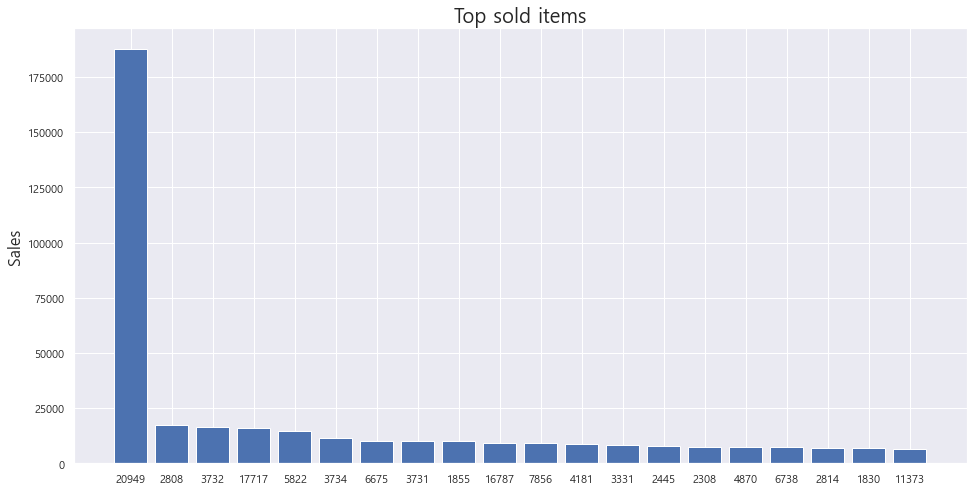

In [45]:
plt.figure(figsize=(16, 8))
plt.bar(train_gb_top.index, train_gb_top['item_cnt_day'])

plt.title('Top sold items', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [46]:
train_gb_order = train_gb.sort_values('revenue', ascending=False)
train_gb_order

,item_cnt_day,revenue
item_id,,
6675,10289.0,2.193915e+08
3732,16642.0,4.361798e+07
13443,1366.0,3.433125e+07
3734,11688.0,3.106516e+07
3733,6506.0,2.229886e+07
...,...,...
18062,-1.0,-4.999000e+03
11871,-1.0,-5.999000e+03
13477,0.0,-7.592000e+03


In [47]:
train_gb_top = train_gb_order.iloc[:20]
train_gb_top.index = train_gb_top.index.astype('str')

Text(0, 0.5, 'Revenue')

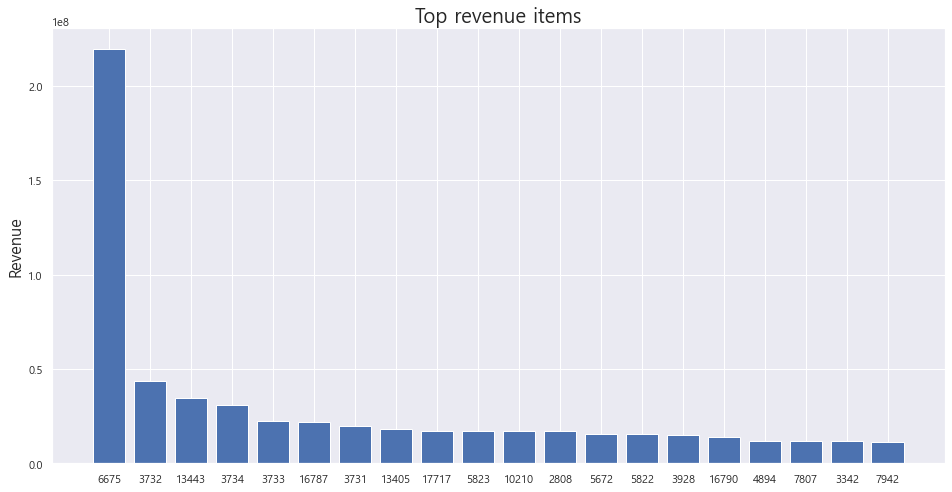

In [48]:
plt.figure(figsize=(16, 8))
plt.bar(train_gb_top.index, train_gb_top['revenue'])

plt.title('Top revenue items', fontsize=20)
plt.ylabel('Revenue', fontsize=16)

## shop_id

In [49]:
train_gb = train.groupby('shop_id').agg({
    target : 'sum',
    'revenue' : 'sum'
})

In [50]:
train_gb

,item_cnt_day,revenue
shop_id,,
0,11705.0,6.637370e+06
1,6311.0,3.238207e+06
2,30620.0,4.404964e+07
3,28355.0,3.014085e+07
4,43942.0,4.053965e+07
5,42762.0,3.816043e+07
6,100489.0,9.806745e+07
7,67058.0,6.695766e+07
8,3595.0,2.349358e+06


In [51]:
train_gb_order = train_gb.sort_values(target, ascending=False)
train_gb_order

,item_cnt_day,revenue
shop_id,,
31,310777.0,2.352170e+08
25,241920.0,2.164806e+08
54,185790.0,1.419397e+08
28,184557.0,1.597463e+08
42,144934.0,1.519170e+08
57,141107.0,1.129998e+08
27,136657.0,1.406325e+08
6,100489.0,9.806745e+07
58,81734.0,6.873762e+07


In [52]:
train_gb_top = train_gb_order.iloc[:20]
train_gb_top.index = train_gb_top.index.astype('str')

Text(0, 0.5, 'Sales')

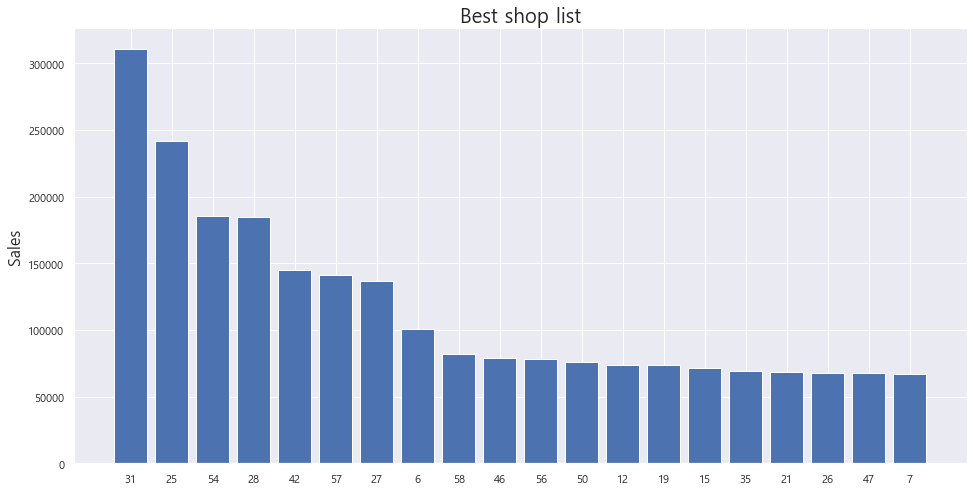

In [53]:
plt.figure(figsize=(16, 8))
plt.bar(train_gb_top.index, train_gb_top['item_cnt_day'])

plt.title('Best shop list', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [54]:
train_gb_order = train_gb.sort_values('revenue', ascending=False)
train_gb_order

,item_cnt_day,revenue
shop_id,,
31,310777.0,2.352170e+08
25,241920.0,2.164806e+08
28,184557.0,1.597463e+08
42,144934.0,1.519170e+08
54,185790.0,1.419397e+08
27,136657.0,1.406325e+08
57,141107.0,1.129998e+08
12,73478.0,1.122051e+08
6,100489.0,9.806745e+07


In [55]:
train_gb_top = train_gb_order.iloc[:20]
train_gb_top.index = train_gb_top.index.astype('str')

Text(0, 0.5, 'Revenue')

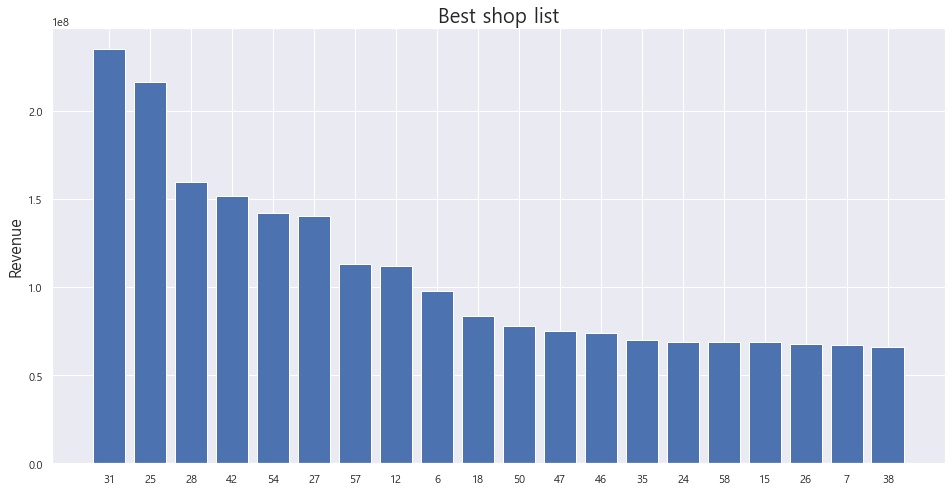

In [56]:
plt.figure(figsize=(16, 8))
plt.bar(train_gb_top.index, train_gb_top['revenue'])

plt.title('Best shop list', fontsize=20)
plt.ylabel('Revenue', fontsize=16)

## year & item_id 

In [57]:
train_gb = train.groupby(['year', 'item_id']).agg({
    target : 'sum'
})

In [58]:
train_gb

item_cnt_day
year item_id              
2013 12                1.0
     19                1.0
     27               36.0
     28               83.0
     29               11.0
...                    ...
2015 22162           698.0
     22163            75.0
     22164           493.0
     22166            84.0
     22167           342.0

[40328 rows x 1 columns]

In [59]:
train_gb = train_gb.reset_index()
train_gb

,year,item_id,item_cnt_day
0,2013,12,1.0
1,2013,19,1.0
2,2013,27,36.0
3,2013,28,83.0
4,2013,29,11.0
...,...,...,...
40323,2015,22162,698.0
40324,2015,22163,75.0
40325,2015,22164,493.0
40326,2015,22166,84.0


In [60]:
train_gb_top = train.groupby(['item_id']).agg({
    target : 'sum'
})

In [61]:
train_gb_top = train_gb_top.sort_values(target, ascending=False)

In [62]:
train_gb_top = train_gb_top.iloc[:10]
train_gb_top

,item_cnt_day
item_id,
20949,187642.0
2808,17245.0
3732,16642.0
17717,15830.0
5822,14515.0
3734,11688.0
6675,10289.0
3731,10099.0
1855,10032.0


In [63]:
top_items = train_gb_top.index
top_items

Int64Index([20949, 2808, 3732, 17717, 5822, 3734, 6675, 3731, 1855, 16787], dtype='int64', name='item_id')

In [64]:
train_gb = train_gb[train_gb['item_id'].isin(top_items)]
train_gb

,year,item_id,item_cnt_day
1106,2013,1855,4047.0
1794,2013,2808,12214.0
2377,2013,3732,11981.0
2378,2013,3734,7649.0
3789,2013,5822,3845.0
4393,2013,6675,3766.0
11344,2013,16787,6430.0
12005,2013,17717,1170.0
14203,2013,20949,63748.0
16051,2014,1855,5192.0


<AxesSubplot:xlabel='item_id', ylabel='item_cnt_day'>

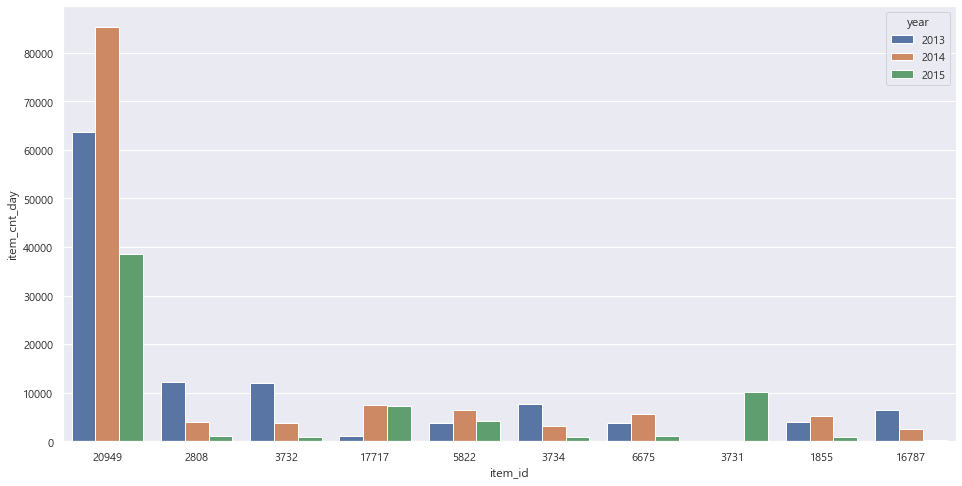

In [65]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=train_gb, x='item_id', y=target, order=top_items, hue='year', ax=ax)

## year & shop_id 

In [66]:
train_gb = train.groupby(['year', 'shop_id']).agg({
    target : 'sum'
})

In [67]:
train_gb

item_cnt_day
year shop_id              
2013 0             11705.0
     1              6311.0
     2              9961.0
     3             10199.0
     4             19002.0
...                    ...
2015 55            31670.0
     56            15198.0
     57            28218.0
     58            18072.0
     59            10491.0

[159 rows x 1 columns]

In [68]:
train_gb = train_gb.reset_index()
train_gb

,year,shop_id,item_cnt_day
0,2013,0,11705.0
1,2013,1,6311.0
2,2013,2,9961.0
3,2013,3,10199.0
4,2013,4,19002.0
...,...,...,...
154,2015,55,31670.0
155,2015,56,15198.0
156,2015,57,28218.0
157,2015,58,18072.0


In [69]:
train_gb_top = train.groupby(['shop_id']).agg({
    target : 'sum'
})

In [70]:
train_gb_top = train_gb_top.sort_values(target, ascending=False)

In [71]:
train_gb_top = train_gb_top.iloc[:10]
train_gb_top

,item_cnt_day
shop_id,
31,310777.0
25,241920.0
54,185790.0
28,184557.0
42,144934.0
57,141107.0
27,136657.0
6,100489.0
58,81734.0


In [72]:
top_shops = train_gb_top.index
top_shops

Int64Index([31, 25, 54, 28, 42, 57, 27, 6, 58, 46], dtype='int64', name='shop_id')

In [73]:
train_gb = train_gb[train_gb['shop_id'].isin(top_shops)]
train_gb

,year,shop_id,item_cnt_day
6,2013,6,46599.0
23,2013,25,102572.0
25,2013,27,54426.0
26,2013,28,78657.0
29,2013,31,132487.0
35,2013,42,53732.0
39,2013,46,35857.0
46,2013,54,96335.0
49,2013,57,60163.0
50,2013,58,32172.0


<AxesSubplot:xlabel='shop_id', ylabel='item_cnt_day'>

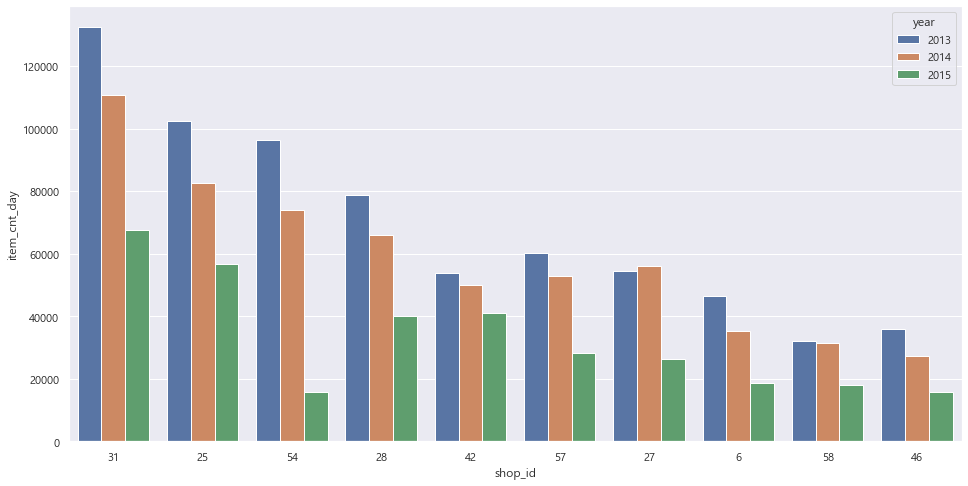

In [74]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=train_gb, x='shop_id', y=target, order=top_shops, hue='year', ax=ax)

## year & item_category_id

In [75]:
train_gb = train.groupby(['year', 'item_category_id']).agg({
    target : 'sum'
})

In [76]:
train_gb

item_cnt_day
year item_category_id              
2013 0                          3.0
     1                          2.0
     2                      11339.0
     3                       6588.0
     4                       1897.0
...                             ...
2015 79                      7268.0
     80                      6136.0
     81                         1.0
     82                        50.0
     83                      3511.0

[216 rows x 1 columns]

In [77]:
train_gb = train_gb.reset_index()
train_gb

,year,item_category_id,item_cnt_day
0,2013,0,3.0
1,2013,1,2.0
2,2013,2,11339.0
3,2013,3,6588.0
4,2013,4,1897.0
...,...,...,...
211,2015,79,7268.0
212,2015,80,6136.0
213,2015,81,1.0
214,2015,82,50.0


In [78]:
train_gb = train_gb.sort_values('item_cnt_day', ascending=False)
train_gb

,year,item_category_id,item_cnt_day
32,2013,40,330890.0
24,2013,30,235213.0
105,2014,40,201538.0
43,2013,55,154935.0
96,2014,30,146457.0
...,...,...,...
113,2014,53,1.0
128,2014,68,1.0
8,2013,10,1.0
213,2015,81,1.0


In [79]:
train_gb_2013 = train_gb[train_gb['year'] == '2013']
train_gb_2014 = train_gb[train_gb['year'] == '2014']
train_gb_2015 = train_gb[train_gb['year'] == '2015']

In [80]:
train_gb_2013

,year,item_category_id,item_cnt_day
32,2013,40,330890.0
24,2013,30,235213.0
43,2013,55,154935.0
16,2013,19,134425.0
29,2013,37,86526.0
...,...,...,...
0,2013,0,3.0
40,2013,52,3.0
41,2013,53,2.0
1,2013,1,2.0


In [81]:
sum_2013 = train_gb_2013[target].sum()
sum_2014 = train_gb_2014[target].sum()
sum_2015 = train_gb_2015[target].sum()

In [82]:
train_gb_2013['rate'] = train_gb_2013[target] / sum_2013 * 100
train_gb_2014['rate'] = train_gb_2014[target] / sum_2014 * 100
train_gb_2015['rate'] = train_gb_2015[target] / sum_2015 * 100

In [83]:
train_gb_2013_top = train_gb_2013.iloc[:10]
train_gb_2014_top = train_gb_2014.iloc[:10]
train_gb_2015_top = train_gb_2015.iloc[:10]

In [84]:
train_gb_2013_top

,year,item_category_id,item_cnt_day,rate
32,2013,40,330890.0,21.173803
24,2013,30,235213.0,15.051388
43,2013,55,154935.0,9.914362
16,2013,19,134425.0,8.601917
29,2013,37,86526.0,5.536838
22,2013,28,77173.0,4.938336
20,2013,23,69997.0,4.479140
59,2013,71,63928.0,4.090782
53,2013,65,25302.0,1.619087
62,2013,75,24222.0,1.549977


In [85]:
train_gb_2013_top = train_gb_2013_top[['item_category_id', 'rate']]
train_gb_2014_top = train_gb_2014_top[['item_category_id', 'rate']]
train_gb_2015_top = train_gb_2015_top[['item_category_id', 'rate']]

In [86]:
train_gb_2013_top = train_gb_2013_top.append({'item_category_id': 'other',
                                              'rate' : 100 - train_gb_2013_top['rate'].sum()}, ignore_index=True)

In [87]:
train_gb_2014_top = train_gb_2014_top.append({'item_category_id': 'other',
                                              'rate' : 100 - train_gb_2014_top['rate'].sum()}, ignore_index=True)

In [88]:
train_gb_2015_top = train_gb_2015_top.append({'item_category_id': 'other',
                                              'rate' : 100 - train_gb_2015_top['rate'].sum()}, ignore_index=True)

In [89]:
train_gb_2013_top

,item_category_id,rate
0,40,21.173803
1,30,15.051388
2,55,9.914362
3,19,8.601917
4,37,5.536838
5,28,4.938336
6,23,4.479140
7,71,4.090782
8,65,1.619087
9,75,1.549977


In [90]:
colors = []

n = len(train_gb_2013_top)
alphas = np.arange(n, 0, -1) / n

for alpha in alphas :
    colors.append((0.3, 0.5, 0.8, alpha))

([<matplotlib.patches.Wedge at 0x1be2ebc6cf8>,
 [Text(-0.49376980950856464, 0.6294373481275763, '40'),
  Text(-0.7784846491651154, -0.18428687151901846, '30'),
  Text(-0.420893591889691, -0.6803297614438121, '55'),
  Text(0.022139545274076865, -0.7996935916556147, '19'),
  Text(0.3636350888991913, -0.7125794847743494, '37'),
  Text(0.5744126188867105, -0.5568214644423387, '28'),
  Text(0.7118032332414402, -0.3651522383157906, '23'),
  Text(0.7832881321384813, -0.1626643847036262, '71'),
  Text(0.7997424075881036, -0.020299790766992128, '65'),
  Text(0.7977998458111032, 0.05929085952977971, '75'),
  Text(0.5298856412003329, 0.5993506546669589, 'other')],
 [Text(-0.37032735713142345, 0.47207801109568226, '21.2'),
  Text(-0.5838634868738365, -0.13821515363926382, '15.1'),
  Text(-0.31567019391726825, -0.510247321082859, '9.9'),
  Text(0.016604658955557648, -0.599770193741711, '8.6'),
  Text(0.27272631667439345, -0.534434613580762, '5.5'),
  Text(0.43080946416503285, -0.417616098331754, '4

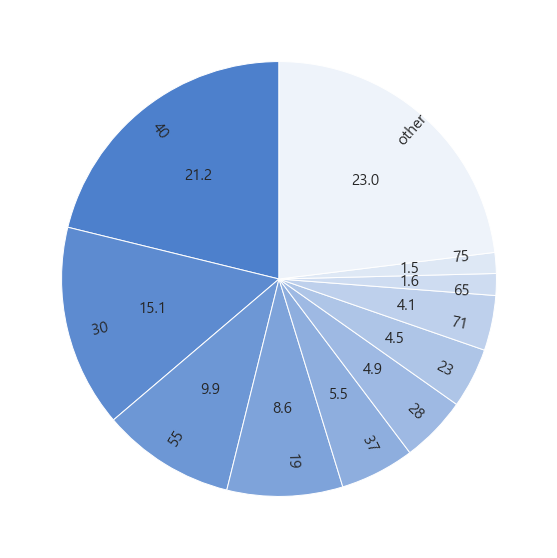

In [91]:
plt.figure(figsize=(12, 10))
plt.pie(train_gb_2013_top['rate'], labels=train_gb_2013_top['item_category_id'], autopct='%.1f', colors=colors,
        startangle=90, labeldistance=0.8, rotatelabels=True, textprops={'fontsize': 15})

In [92]:
colors = [[] for _ in range(3)]

n = len(train_gb_2013_top)
alphas = np.arange(n, 0, -1) / n

for alpha in alphas :
    colors[0].append((0.3, 0.5, 0.8, alpha))
    colors[1].append((0.3, 0.7, 0.3, alpha))
    colors[2].append((0.75, 0.3, 0.3, alpha))

In [93]:
dfs = [train_gb_2013_top, train_gb_2014_top, train_gb_2015_top]

In [94]:
titles = ['2013', '2014', '2015']

Text(0.5, 0.98, 'Top selling categories for each year')

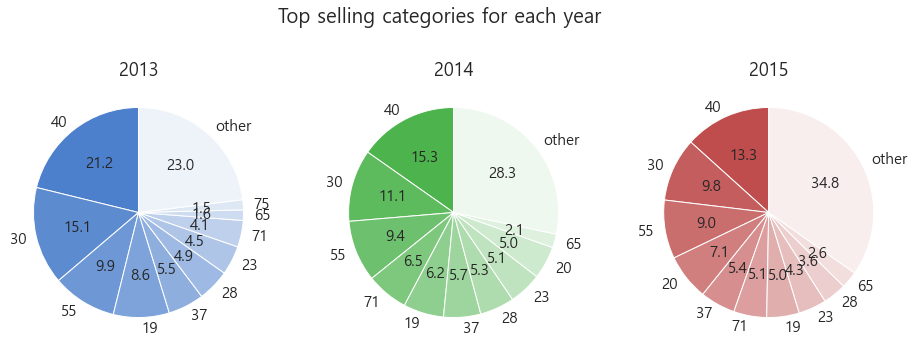

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for ax, df, color, title in zip(axes, dfs, colors, titles) :
    ax.pie(df['rate'], labels=df['item_category_id'], autopct='%.1f', colors=color, startangle=90, textprops={'fontsize': 15})
    ax.set_title(title, fontsize=18)
    
fig.suptitle('Top selling categories for each year', fontsize=20)

## year & type_id

In [96]:
train_gb = train.groupby(['year', 'type_id']).agg({
    target : 'sum'
})

In [97]:
train_gb

item_cnt_day
year type_id              
2013 0                 3.0
     1             32825.0
     3              2815.0
     4             12635.0
     5            253819.0
     8            328004.0
     9             11230.0
     10             1799.0
     11           450848.0
     12            28221.0
     13           185993.0
     14           200367.0
     15            36216.0
     16             1170.0
     17              929.0
     18             9867.0
     19             5992.0
2014 1             35030.0
     2              7587.0
     3              6199.0
     4             15642.0
     5            244420.0
     6                 5.0
     7                 2.0
     8            240449.0
     9             19739.0
     10             5629.0
     11           306718.0
     12            23388.0
     13           144824.0
     14           236018.0
     15            24763.0
     16             7392.0
     17               35.0
     18              520.0
     19             2529.0
2015 1             17201.0
     2              6112.0
     3              9104.0
     4              3878.0
     5            148535.0
     6               109.0
     7                 6.0
     8            120645.0
     9             15486.0
     11           159377.0
     12            24732.0
     13            80477.0
     14           147981.0
     15            13975.0
     16            13404.0
     17                1.0
     18               50.0
     19             3511.0

In [98]:
train_gb = train_gb.reset_index()
train_gb

,year,type_id,item_cnt_day
0,2013,0,3.0
1,2013,1,32825.0
2,2013,3,2815.0
3,2013,4,12635.0
4,2013,5,253819.0
5,2013,8,328004.0
6,2013,9,11230.0
7,2013,10,1799.0
8,2013,11,450848.0
9,2013,12,28221.0


In [99]:
train_gb_top = train.groupby(['type_id']).agg({
    target : 'sum'
})

In [100]:
train_gb_top = train_gb_top.sort_values(target, ascending=False)

In [101]:
train_gb_top = train_gb_top.iloc[:10]
train_gb_top

,item_cnt_day
type_id,
11,916943.0
8,689098.0
5,646774.0
14,584366.0
13,411294.0
1,85056.0
12,76341.0
15,74954.0
9,46455.0


In [102]:
top_types = train_gb_top.index
top_types

Int64Index([11, 8, 5, 14, 13, 1, 12, 15, 9, 4], dtype='int64', name='type_id')

In [103]:
train_gb = train_gb[train_gb['type_id'].isin(top_types)]
train_gb

,year,type_id,item_cnt_day
1,2013,1,32825.0
3,2013,4,12635.0
4,2013,5,253819.0
5,2013,8,328004.0
6,2013,9,11230.0
8,2013,11,450848.0
9,2013,12,28221.0
10,2013,13,185993.0
11,2013,14,200367.0
12,2013,15,36216.0


<AxesSubplot:xlabel='type_id', ylabel='item_cnt_day'>

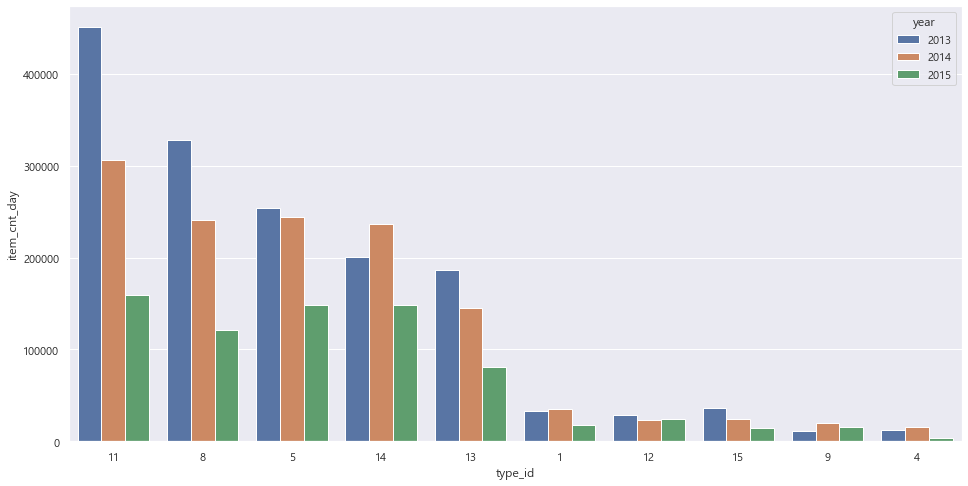

In [104]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=train_gb, x='type_id', y=target, order=top_types, hue='year', ax=ax)

## date_block_num & item_price

In [105]:
train_gb = train.groupby(['date_block_num', 'item_id']).agg({
    'year' : 'first',
    'month' : 'first',
    'item_price' : 'mean',
    target : 'sum'
})

In [106]:
train_gb

year month   item_price  item_cnt_day
date_block_num item_id                                       
0              19       2013    01    28.000000           1.0
               27       2013    01  2325.000000           7.0
               28       2013    01   549.000000           8.0
               29       2013    01  2397.500000           4.0
               32       2013    01   338.110349         299.0
...                      ...   ...          ...           ...
33             22162    2015    10   349.000000          10.0
               22163    2015    10   162.698400          26.0
               22164    2015    10   549.000000          15.0
               22166    2015    10   150.000000          11.0
               22167    2015    10   293.098437          37.0

[233912 rows x 4 columns]

In [107]:
train_gb['label'] = train_gb['year'] + '-' + train_gb['month']
train_gb

year month   item_price  item_cnt_day    label
date_block_num item_id                                                
0              19       2013    01    28.000000           1.0  2013-01
               27       2013    01  2325.000000           7.0  2013-01
               28       2013    01   549.000000           8.0  2013-01
               29       2013    01  2397.500000           4.0  2013-01
               32       2013    01   338.110349         299.0  2013-01
...                      ...   ...          ...           ...      ...
33             22162    2015    10   349.000000          10.0  2015-10
               22163    2015    10   162.698400          26.0  2015-10
               22164    2015    10   549.000000          15.0  2015-10
               22166    2015    10   150.000000          11.0  2015-10
               22167    2015    10   293.098437          37.0  2015-10

[233912 rows x 5 columns]

In [108]:
train_gb = train_gb.reset_index()
train_gb

,date_block_num,item_id,year,month,item_price,item_cnt_day,label
0,0,19,2013,01,28.000000,1.0,2013-01
1,0,27,2013,01,2325.000000,7.0,2013-01
2,0,28,2013,01,549.000000,8.0,2013-01
3,0,29,2013,01,2397.500000,4.0,2013-01
4,0,32,2013,01,338.110349,299.0,2013-01
...,...,...,...,...,...,...,...
233907,33,22162,2015,10,349.000000,10.0,2015-10
233908,33,22163,2015,10,162.698400,26.0,2015-10
233909,33,22164,2015,10,549.000000,15.0,2015-10
233910,33,22166,2015,10,150.000000,11.0,2015-10


In [109]:
train_gb_top = train.groupby(['item_id']).agg({
    target : 'sum'
})

In [110]:
train_gb_top = train_gb_top.sort_values(target, ascending=False)

In [111]:
train_gb_top = train_gb_top.iloc[:10]
train_gb_top

,item_cnt_day
item_id,
20949,187642.0
2808,17245.0
3732,16642.0
17717,15830.0
5822,14515.0
3734,11688.0
6675,10289.0
3731,10099.0
1855,10032.0


In [112]:
top_items = train_gb_top.index
top_items

Int64Index([20949, 2808, 3732, 17717, 5822, 3734, 6675, 3731, 1855, 16787], dtype='int64', name='item_id')

In [113]:
train_gb = train_gb[train_gb['item_id'].isin(top_items)]
train_gb

,date_block_num,item_id,year,month,item_price,item_cnt_day,label
811,0,2808,2013,01,981.221243,858.0,2013-01
1809,0,5822,2013,01,986.479361,300.0,2013-01
6532,0,17717,2013,01,484.876344,145.0,2013-01
8965,1,2808,2013,02,979.312946,541.0,2013-02
9989,1,5822,2013,02,1036.812849,245.0,2013-02
...,...,...,...,...,...,...,...
229942,33,5822,2015,10,1144.169886,259.0,2015-10
230127,33,6675,2015,10,24691.500000,2.0,2015-10
232653,33,16787,2015,10,2099.000000,19.0,2015-10
232821,33,17717,2015,10,1161.032213,521.0,2015-10


[Text(0, 0, '2013-01'),
 Text(1, 0, '2013-02'),
 Text(2, 0, '2013-03'),
 Text(3, 0, '2013-04'),
 Text(4, 0, '2013-05'),
 Text(5, 0, '2013-06'),
 Text(6, 0, '2013-07'),
 Text(7, 0, '2013-08'),
 Text(8, 0, '2013-09'),
 Text(9, 0, '2013-10'),
 Text(10, 0, '2013-11'),
 Text(11, 0, '2013-12'),
 Text(12, 0, '2014-01'),
 Text(13, 0, '2014-02'),
 Text(14, 0, '2014-03'),
 Text(15, 0, '2014-04'),
 Text(16, 0, '2014-05'),
 Text(17, 0, '2014-06'),
 Text(18, 0, '2014-07'),
 Text(19, 0, '2014-08'),
 Text(20, 0, '2014-09'),
 Text(21, 0, '2014-10'),
 Text(22, 0, '2014-11'),
 Text(23, 0, '2014-12'),
 Text(24, 0, '2015-01'),
 Text(25, 0, '2015-02'),
 Text(26, 0, '2015-03'),
 Text(27, 0, '2015-04'),
 Text(28, 0, '2015-05'),
 Text(29, 0, '2015-06'),
 Text(30, 0, '2015-07'),
 Text(31, 0, '2015-08'),
 Text(32, 0, '2015-09'),
 Text(33, 0, '2015-10')]

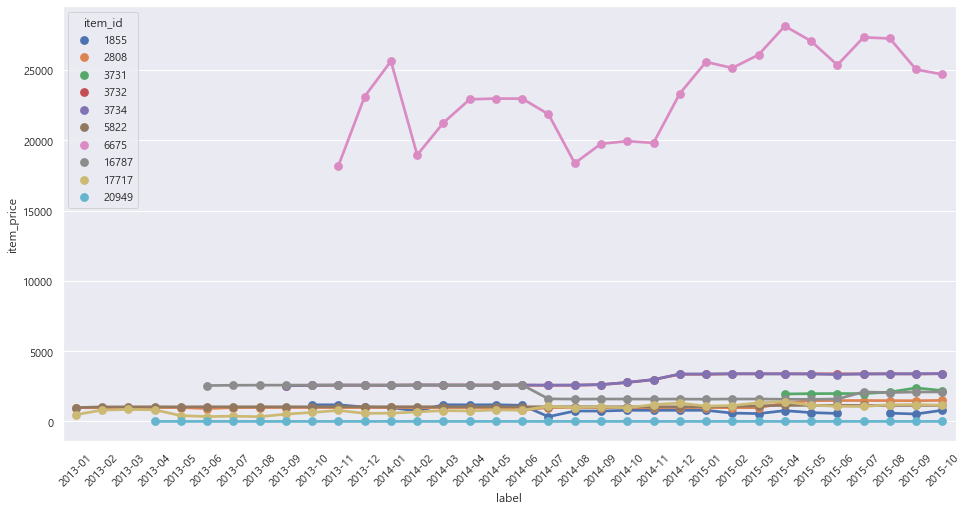

In [114]:
plt.figure(figsize = (16, 8))
ax = sns.pointplot(data=train_gb, x='label', y='item_price', hue='item_id')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [115]:
train_gb_a = train_gb[train_gb['item_id'] == 6675]
train_gb_b = train_gb[train_gb['item_id'] != 6675]

[Text(0, 0, '2013-11'),
 Text(1, 0, '2013-12'),
 Text(2, 0, '2014-01'),
 Text(3, 0, '2014-02'),
 Text(4, 0, '2014-03'),
 Text(5, 0, '2014-04'),
 Text(6, 0, '2014-05'),
 Text(7, 0, '2014-06'),
 Text(8, 0, '2014-07'),
 Text(9, 0, '2014-08'),
 Text(10, 0, '2014-09'),
 Text(11, 0, '2014-10'),
 Text(12, 0, '2014-11'),
 Text(13, 0, '2014-12'),
 Text(14, 0, '2015-01'),
 Text(15, 0, '2015-02'),
 Text(16, 0, '2015-03'),
 Text(17, 0, '2015-04'),
 Text(18, 0, '2015-05'),
 Text(19, 0, '2015-06'),
 Text(20, 0, '2015-07'),
 Text(21, 0, '2015-08'),
 Text(22, 0, '2015-09'),
 Text(23, 0, '2015-10')]

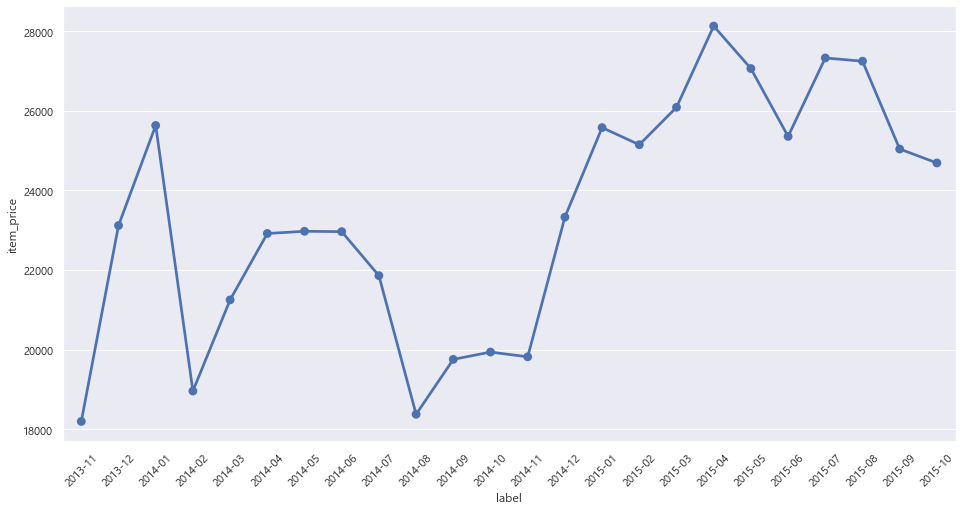

In [116]:
plt.figure(figsize = (16, 8))
ax = sns.pointplot(data=train_gb_a, x='label', y='item_price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, '2013-01'),
 Text(1, 0, '2013-02'),
 Text(2, 0, '2013-03'),
 Text(3, 0, '2013-04'),
 Text(4, 0, '2013-05'),
 Text(5, 0, '2013-06'),
 Text(6, 0, '2013-07'),
 Text(7, 0, '2013-08'),
 Text(8, 0, '2013-09'),
 Text(9, 0, '2013-10'),
 Text(10, 0, '2013-11'),
 Text(11, 0, '2013-12'),
 Text(12, 0, '2014-01'),
 Text(13, 0, '2014-02'),
 Text(14, 0, '2014-03'),
 Text(15, 0, '2014-04'),
 Text(16, 0, '2014-05'),
 Text(17, 0, '2014-06'),
 Text(18, 0, '2014-07'),
 Text(19, 0, '2014-08'),
 Text(20, 0, '2014-09'),
 Text(21, 0, '2014-10'),
 Text(22, 0, '2014-11'),
 Text(23, 0, '2014-12'),
 Text(24, 0, '2015-01'),
 Text(25, 0, '2015-02'),
 Text(26, 0, '2015-03'),
 Text(27, 0, '2015-04'),
 Text(28, 0, '2015-05'),
 Text(29, 0, '2015-06'),
 Text(30, 0, '2015-07'),
 Text(31, 0, '2015-08'),
 Text(32, 0, '2015-09'),
 Text(33, 0, '2015-10')]

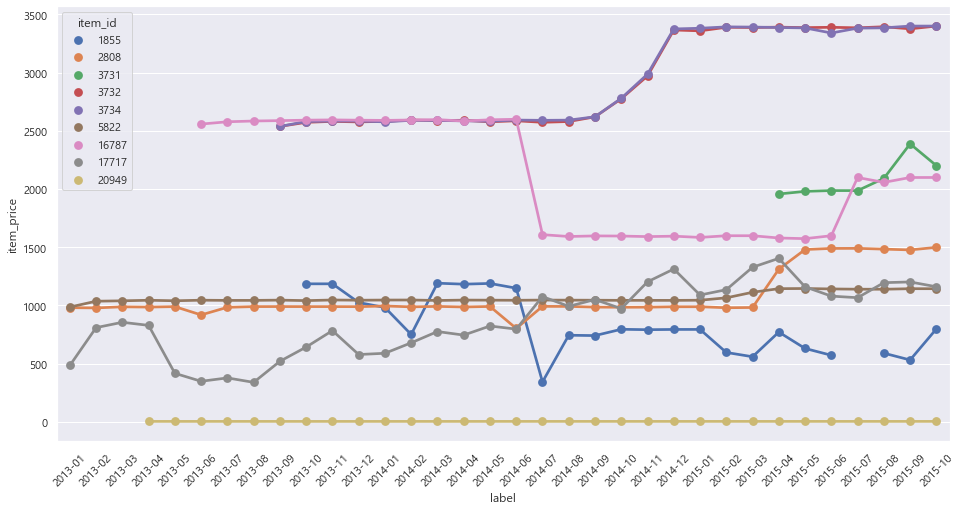

In [117]:
plt.figure(figsize = (16, 8))
ax = sns.pointplot(data=train_gb_b, x='label', y='item_price', hue='item_id')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# (추가) target scale 변경

In [118]:
# train_og = train.copy()

In [119]:
# train[target] = np.log1p(train[target])

## 수치형 data